# Room Classification and Object Detection using YOLOv8
This project demonstrates how to use YOLOv8 for object detection and room classification based on the objects present in an image. The model is pretrained on the COCO dataset and is capable of detecting key objects that help in classifying various room types (e.g., bedroom, kitchen, bathroom). The project is implemented in a Python notebook.

# Project Overview
The aim of this project is to detect objects in still images and classify the type of room (such as a bedroom, bathroom, kitchen, etc.) based on the detected objects. The model uses a pretrained YOLOv8 architecture for object detection and leverages the relationships between objects to make decisions about the room type.

# Package Installation

In [ ]:
!pip install torch torchvision onnx tensorflow opencv-python

In [ ]:
!pip install ultralytics

# Main code starts

## import essential library and Load the yolo8n model

In [3]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
from pathlib import Path

# Load the YOLOv8n model only once
model = YOLO('yolov8n.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 76.2MB/s]


## define room objects

In [20]:
# Dictionary mapping objects to room types
room_objects = {
    'bed': 'bedroom',
    'pillow': 'bedroom',
    'lamp': 'bedroom',
    'wardrobe': 'bedroom',
    'blanket': 'bedroom',
    'nightstand': 'bedroom',
    'dresser': 'bedroom',

    'toilet': 'bathroom',
    'sink': 'bathroom',
    'bathtub': 'bathroom',
    'shower': 'bathroom',
    'towel': 'bathroom',
    'mirror': 'bathroom',
    'soap': 'bathroom',

    'oven': 'kitchen',
    'refrigerator': 'kitchen',
    'stove': 'kitchen',
    'microwave': 'kitchen',
    'sink': 'kitchen',
    'dishwasher': 'kitchen',
    'bowl': 'kitchen',
    'fork': 'kitchen',
    'spoon': 'kitchen',
    'knife': 'kitchen',
    'plate': 'kitchen',
    'pan': 'kitchen',
    'pot': 'kitchen',

    'dining tables': 'living room',
    'sofa': 'living room',
    'chair': 'living room',
    'tv': 'living room',
    'coffee table': 'living room',
    'armchair': 'living room',
    'bookshelf': 'living room',
    'rug': 'living room',
    'lamp': 'living room'
}

## detect and classify room

In [34]:
# Function to detect objects and classify the room
def detect_and_classify_room(image_path):

    # Run detection on the provided image
    results = model.predict(source=image_path, save=True)

    # Get detected object names
    class_names = model.names
    detected_objects = [class_names[int(cls)] for cls in results[0].boxes.cls]

    # Object-specific weights for classification
    object_weights = {
        # Bathroom objects
        'toilet': {'bathroom': 2},
        'sink': {'bathroom': 1, 'kitchen': 1},
        'bathtub': {'bathroom': 2},
        'shower': {'bathroom': 2},

        # Kitchen objects
        'oven': {'kitchen': 2},
        'stove': {'kitchen': 2},
        'refrigerator': {'kitchen': 2},
        'microwave': {'kitchen': 1},
        'dishwasher': {'kitchen': 1},
        'sink': {'kitchen': 1, 'bathroom': 1},

        # Bedroom objects
        'bed': {'bedroom': 2},
        'pillow': {'bedroom': 1},
        'wardrobe': {'bedroom': 1},
        'blanket': {'bedroom': 1},
        'nightstand': {'bedroom': 1},

        # Living room objects
        'sofa': {'living room': 2},
        'couch' : {'living room': 2},
        'tv': {'living room': 2},

        # Dining room objects
        'dining table': {'dining room': 2},
        'chair': {'dining room': 1, 'living room': 1, 'bedroom': 1},  # Could appear in multiple rooms
        'plate': {'dining room': 1, 'kitchen': 1},
    }

    # Reset room votes
    room_votes = {
        'bedroom': 0,
        'bathroom': 0,
        'kitchen': 0,
        'living room': 0,
        'dining room': 0,
    }

    # Update room votes based on detected objects and their weights
    for obj in detected_objects:
        if obj in object_weights:
            for room, weight in object_weights[obj].items():
                room_votes[room] += weight
    print('room votes', room_votes)
    # Classify the room based on the highest votes
    room_prediction = max(room_votes, key=room_votes.get)

    # Output the room classification result
    if room_prediction:
        print(f"Room classified as: {room_prediction}")
    else:
        print("Room classification: Unknown")

    return results

## pass the image path and get the result


image 1/1 /content/download.jpeg: 448x640 1 bottle, 5 chairs, 3 couchs, 1 potted plant, 1 tv, 2 books, 174.6ms
Speed: 4.5ms preprocess, 174.6ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
room votes {'bedroom': 5, 'bathroom': 0, 'kitchen': 0, 'living room': 13, 'dining room': 5}
Room classified as: living room


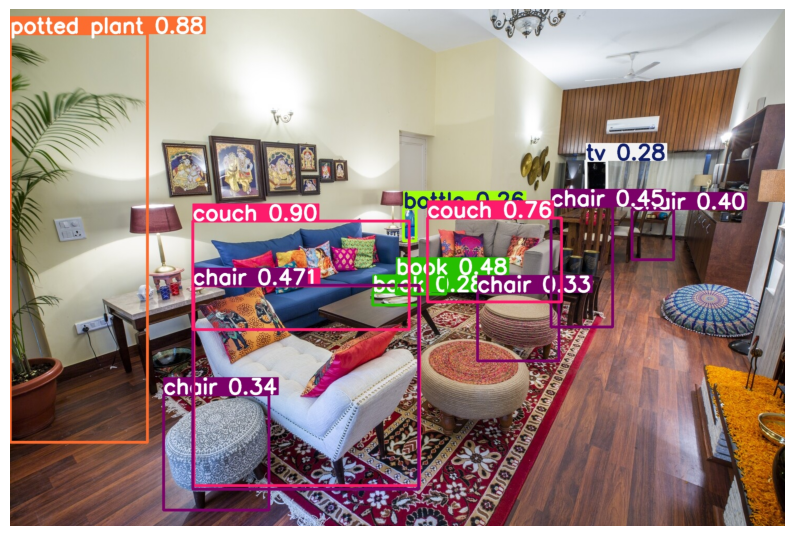

In [41]:
from re import split
# Change this path to your new image
image_path = '/content/download.jpeg'

# Detect objects and classify the room
results = detect_and_classify_room(image_path)

# Load and display the result image with bounding boxes
pic_name = results[0].path.split('/')[-1]
result_image_path = results[0].save_dir + '/' + pic_name # Path to the saved image
result_image = cv2.imread(str(result_image_path))

# Convert BGR (OpenCV) to RGB for displaying in Matplotlib
result_image_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)

# Display the image with detected objects and bounding boxes
plt.figure(figsize=(10, 8))
plt.imshow(result_image_rgb)
plt.axis('off')
plt.show()

# TF lite for reference

In [ ]:
from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO("yolov8n.pt")

# Export the model to TFLite format
model.export(format="tflite")  # creates 'yolov8n_float32.tflite'

# Load the exported TFLite model
tflite_model = YOLO("yolov8n_float32.tflite")

# # Run inference
# results = tflite_model("https://ultralytics.com/images/bus.jpg")